In [2]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import seaborn as sns

In [3]:
# Lê o csv
data = pd.read_csv('iris-with-errors.csv', header=(0))

print('Linhas: {}\nColunas: {}'.format(data.shape[0], data.shape[1]))
data.head(10)

Linhas: 25
Colunas: 5


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,duplicada
1,5.1,3.5,1.4,0.2,duplicada
2,?,3,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,5.1,3.5,1.4,0.2,duplicada
5,NaN,3.1,1.5,0.2,setosa
6,5,3.6,1.4,0.2,setosa
7,5.4,3.9,1.7,0.4,duplicada
8,5.4,3.9,1.7,0.4,duplicada
9,4.6,3.4,1.4,NaN,setosa


In [4]:
# Troca valores '?' por nulo
data = data.replace('?', np.nan)
data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,duplicada
1,5.1,3.5,1.4,0.2,duplicada
2,NaN,3,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,5.1,3.5,1.4,0.2,duplicada
5,NaN,3.1,1.5,0.2,setosa
6,5,3.6,1.4,0.2,setosa
7,5.4,3.9,1.7,0.4,duplicada
8,5.4,3.9,1.7,0.4,duplicada
9,4.6,3.4,1.4,NaN,setosa


In [5]:
# Remove valores nulos
data = data.dropna(axis=0)
data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,duplicada
1,5.1,3.5,1.4,0.2,duplicada
3,4.7,3.2,1.3,0.2,setosa
4,5.1,3.5,1.4,0.2,duplicada
6,5,3.6,1.4,0.2,setosa
7,5.4,3.9,1.7,0.4,duplicada
8,5.4,3.9,1.7,0.4,duplicada
10,5,3.4,1.5,0.2,setosa
11,4.4,2.9,1.4,0.2,duplicada
12,4.9,3.1,1.5,0.1,setosa


In [6]:
# Remove duplicatas
data = data.drop_duplicates()
data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,duplicada
3,4.7,3.2,1.3,0.2,setosa
6,5,3.6,1.4,0.2,setosa
7,5.4,3.9,1.7,0.4,duplicada
10,5,3.4,1.5,0.2,setosa
11,4.4,2.9,1.4,0.2,duplicada
12,4.9,3.1,1.5,0.1,setosa
13,5.4,3.7,1.5,0.2,setosa
15,4.8,3.4,1.6,0.2,setosa
16,4.8,3,1.4,0.1,setosa


In [7]:
# Retira colunas
data = data.drop(data.columns[[1,3]], axis=1)
# Retira linhas
data = data.drop(data.index[[0,2]], axis=0)
data.head(10)

,sepal_length,petal_length,species
3,4.7,1.3,setosa
7,5.4,1.7,duplicada
10,5,1.5,setosa
11,4.4,1.4,duplicada
12,4.9,1.5,setosa
13,5.4,1.5,setosa
15,4.8,1.6,setosa
16,4.8,1.4,setosa
18,4.3,1.1,setosa
19,5.8,1.2,setosa


In [8]:
# Checkpoint resetando a base de dados
data = pd.read_csv('iris-with-errors.csv', header=(0))
data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,duplicada
1,5.1,3.5,1.4,0.2,duplicada
2,?,3,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,5.1,3.5,1.4,0.2,duplicada
5,NaN,3.1,1.5,0.2,setosa
6,5,3.6,1.4,0.2,setosa
7,5.4,3.9,1.7,0.4,duplicada
8,5.4,3.9,1.7,0.4,duplicada
9,4.6,3.4,1.4,NaN,setosa


In [13]:
data = data.replace('?', np.nan)

# Cria um array numpy copiando tudo menos a coluna das espécies
x = np.array(data[data.columns[0:data.shape[1]-1]], dtype=float)
# Calcula a média das colunas
medias = np.nanmean(x, axis=0)

# Substitui os valores nulos por uma média da coluna
for i in np.arange(0, x.shape[0]):
	for j in np.arange(0, x.shape[1]):
		if(np.isnan(x[i, j])):
			x[i,j] = medias[j]

print(x)

[[5.1        3.5        1.4        0.2       ]
 [5.1        3.5        1.4        0.2       ]
 [5.02272727 3.         1.4        0.2       ]
 [4.7        3.2        1.3        0.2       ]
 [5.1        3.5        1.4        0.2       ]
 [5.02272727 3.1        1.5        0.2       ]
 [5.         3.6        1.4        0.2       ]
 [5.4        3.9        1.7        0.4       ]
 [5.4        3.9        1.7        0.4       ]
 [4.6        3.4        1.4        0.22608696]
 [5.         3.4        1.5        0.2       ]
 [4.4        2.9        1.4        0.2       ]
 [4.9        3.1        1.5        0.1       ]
 [5.4        3.7        1.5        0.2       ]
 [4.4        2.9        1.4        0.2       ]
 [4.8        3.4        1.6        0.2       ]
 [4.8        3.         1.4        0.1       ]
 [4.4        2.9        1.4        0.2       ]
 [4.3        3.         1.1        0.1       ]
 [5.8        4.         1.2        0.2       ]
 [5.7        4.4        1.5        0.4       ]
 [5.4        

In [11]:
# Mostra informações gerais sobre o formato dos dados
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  22 non-null     object 
 1   sepal_width   24 non-null     object 
 2   petal_length  25 non-null     float64
 3   petal_width   23 non-null     object 
 4   species       25 non-null     object 
dtypes: float64(1), object(4)
memory usage: 1.1+ KB


In [12]:
# Mosta informações sobre uma coluna
data.describe()

,petal_length
count,25.000000
mean,1.440000
std,0.141421
min,1.100000
25%,1.400000
50%,1.400000
75%,1.500000
max,1.700000


In [14]:
# Importa o dataset iris completo
data = datasets.load_iris()
# Transforma do formato do sklearn para o formato do pandas
data = pd.DataFrame(data=np.c_[data['data'], data['target']], columns=data['feature_names']+['target'])

# Transforma do formato pandas para o formato np.array
x = np.array(data[data.columns[0:data.shape[1]-1]], dtype=float)
# Escalador minmax, considera o maior valor como 1 e o menor como 0, os outros são escalados para um número entre 0 e 1
scaler = MinMaxScaler(feature_range=(0,1))
# Aplica o escalador no array
x_pad = scaler.fit_transform(x)

print(x_pad)

[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]
 [0.30555556 0.79166667 0.11864407 0.125     ]
 [0.08333333 0.58333333 0.06779661 0.08333333]
 [0.19444444 0.58333333 0.08474576 0.04166667]
 [0.02777778 0.375      0.06779661 0.04166667]
 [0.16666667 0.45833333 0.08474576 0.        ]
 [0.30555556 0.70833333 0.08474576 0.04166667]
 [0.13888889 0.58333333 0.10169492 0.04166667]
 [0.13888889 0.41666667 0.06779661 0.        ]
 [0.         0.41666667 0.01694915 0.        ]
 [0.41666667 0.83333333 0.03389831 0.04166667]
 [0.38888889 1.         0.08474576 0.125     ]
 [0.30555556 0.79166667 0.05084746 0.125     ]
 [0.22222222 0.625      0.06779661 0.08333333]
 [0.38888889 0.75       0.11864407 0.08333333]
 [0.22222222 0.75       0.08474576 0.08333333]
 [0.30555556 0.58333333 0.11864407 0.04166667]
 [0.22222222 

In [15]:
data = datasets.load_iris()
data = pd.DataFrame(data=np.c_[data['data'], data['target']], columns=data['feature_names']+['target'])

x = np.array(data[data.columns[0:data.shape[1]-1]], dtype=float)
scaler = StandardScaler().fit(x)
x_pad = scaler.transform(x)

print(x_pad)

[[-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e+00]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00]
 [-5.37177559e-01  1.47939788e+00 -1.28338910e+00 -1.31544430e+00]
 [-1.26418478e+00  7.88807586e-01 -1.22655167e+00 -1.31544430e+00]
 [-1.26418478e+00 -1.31979479e-01 -1.34022653e+00 -1.44707648e+00]
 [-1.87002413e+00 -1.31979479e-01 -1.51073881e+00 -1.44707648e+00]
 [-5.25060772e-02  2.16998818e+00 -1.45390138e+00 -1.31544430e

In [16]:
# Checkpoint resetando a base de dados
data = pd.read_csv('iris-with-errors.csv', header=(0))
data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,duplicada
1,5.1,3.5,1.4,0.2,duplicada
2,?,3,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,5.1,3.5,1.4,0.2,duplicada
5,NaN,3.1,1.5,0.2,setosa
6,5,3.6,1.4,0.2,setosa
7,5.4,3.9,1.7,0.4,duplicada
8,5.4,3.9,1.7,0.4,duplicada
9,4.6,3.4,1.4,NaN,setosa


In [17]:
# Valores string não podem ser usados
print(data[data.columns[-1]])

0     duplicada
1     duplicada
2        setosa
3        setosa
4     duplicada
5        setosa
6        setosa
7     duplicada
8     duplicada
9        setosa
10       setosa
11    duplicada
12       setosa
13       setosa
14    duplicada
15       setosa
16       setosa
17    duplicada
18       setosa
19       setosa
20       setosa
21       setosa
22       setosa
23       setosa
24       setosa
Name: species, dtype: object


In [18]:
# Pega entradas únicas na coluna
classes = np.unique(data[data.columns[-1]])
quant = 0

# Substitui a string por um número
for i in classes:
    data = data.replace(i, quant)
    quant += 1

print(data[data.columns[-1]])

0     0
1     0
2     1
3     1
4     0
5     1
6     1
7     0
8     0
9     1
10    1
11    0
12    1
13    1
14    0
15    1
16    1
17    0
18    1
19    1
20    1
21    1
22    1
23    1
24    1
Name: species, dtype: int64


In [19]:
# Uma tabela simples para exemplo
df = pd.DataFrame({'A':['a','b','c','a','c','b']})
df.head()

,A
0,a
1,b
2,c
3,a
4,c


In [20]:
# Pega uma tabela e representa ela bináriamente
df = pd.get_dummies(df)
df.head()

,A_a,A_b,A_c
0,True,False,False
1,False,True,False
2,False,False,True
3,True,False,False
4,False,False,True


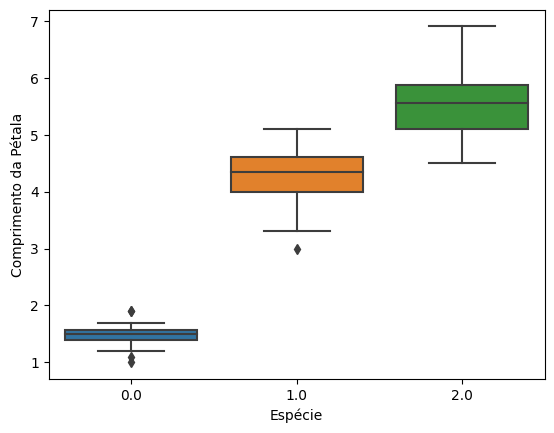

In [21]:
data = datasets.load_iris()
data = pd.DataFrame(data=np.c_[data['data'], data['target']], columns=data['feature_names']+['target'])

# Gera um gráfico de blocos, mostrando outliars, minimos, maximos, e média dos dados
sns.boxplot(x='target', y='petal length (cm)', data=data)
plt.xlabel('Espécie', fontsize=10)
plt.ylabel('Comprimento da Pétala', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [22]:
q1 = data.quantile(0.25)
q2 = data.quantile(0.75)
iqr = q2-q1

print((data<(q1-1.5*iqr))|(data>(q2+1.5*iqr)))
print((data<(q1-1.5*iqr))|(data>(q2+1.5*iqr)).any(axis=1))

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)   
0                False             False              False             False  \
1                False             False              False             False   
2                False             False              False             False   
3                False             False              False             False   
4                False             False              False             False   
..                 ...               ...                ...               ...   
145              False             False              False             False   
146              False             False              False             False   
147              False             False              False             False   
148              False             False              False             False   
149              False             False              False             False   

     target  
0     False  